In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m

In [28]:
df = pd.read_csv('D:\HomeLab\Temp_vs_Hum\Dataset\\feeds.csv', sep=',')

var_df = df[['field1', 'field2']]
var_df.head(5)

,field1,field2
0,17.5,76.2
1,17.5,76.0
2,17.4,76.1
3,17.4,75.6
4,32.3,36.1


In [29]:
temp_datax = var_df.field1.dropna().tolist()
hum_datay = var_df.field2.dropna().tolist()

# log of hum_datay
hum_datay_log = [np.log(i) for i in hum_datay]

#fit the model
fit = np.polyfit(temp_datax, np.log(hum_datay), 1)

#view the output of the model
print(fit)

equation = f"y = 174.93 * e** 0.052x"

print(equation)

a = float(174.93)
b = float(-0.05247)

[-0.05247519  5.16448548]
y = 174.93 * e** 0.052x


In [30]:
import math 

def eq(x, a, b):
    return a * m.exp(b * x)

hum_datay_pred = [eq(i, a, b) for i in temp_datax]

print(hum_datay[0:5])
print(hum_datay_pred[0:5])

[76.2, 76.0, 76.1, 75.6, 36.1]
[69.83678620272482, 69.83678620272482, 70.20418284211434, 70.20418284211434, 32.12404752993326]


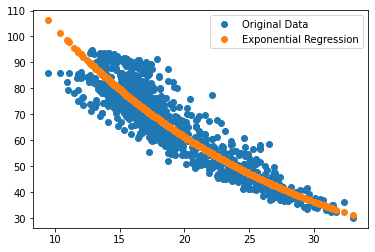

R-squared value: (0.8366590834992218, 5.1047009476544245, 44.1156174687834, 6.641958857805685)


In [33]:
#Calculate r squared value between hum_datay and hum_datay_pred
def r_squared(y_actual, y_predicted):
    numerator = sum([(y_actual[i] - y_predicted[i]) ** 2 for i in range(len(y_actual))])
    denominator = sum([(y_actual[i] - np.mean(y_actual)) ** 2 for i in range(len(y_actual))])
    r_squared = 1- (numerator / denominator)

    #Calculate mean absolute error
    mean_absolute_error = sum([abs(y_actual[i] - y_predicted[i]) for i in range(len(y_actual))]) / len(y_actual)

    #Calculate mean squared error
    mean_squared_error = sum([(y_actual[i] - y_predicted[i]) ** 2 for i in range(len(y_actual))]) / len(y_actual)

    #Calculate standard error
    standard_error = np.sqrt(mean_squared_error)

    return r_squared, mean_absolute_error, mean_squared_error, standard_error


#Plot hum_datay and hum_datay_pred
plt.plot(temp_datax, hum_datay, 'o', label='Original Data')
plt.plot(temp_datax, hum_datay_pred, 'o', label='Exponential Regression')
plt.legend()
plt.show()

print(f"R-squared value: {r_squared(hum_datay, hum_datay_pred)}")



In [32]:
# First equation
def func1(x, y, z):
    sum_v = []
    k_sumx = []
    n_l = 0

    for i in range(len(z)):
        sum_v.append(z[i])
        k_sumx.append(x[i])
        n_l += 1

    return print(f"{sum(sum_v)} = k{sum(k_sumx)} + {n_l}L")

func1(temp_datax, hum_datay, hum_datay_log)


def func2(x, y, z):
    x_times_z = []
    for i in range(len(x)):
        x_times_z.append(x[i] * z[i])
    
    k_sumx_squared = []
    for i in range(len(x)):
        k_sumx_squared.append(x[i] ** 2)
    
    l_times_sumx = []
    for i in range(len(x)):
        l_times_sumx.append(x[i])

    return print(f"{sum(x_times_z)} = k{sum(k_sumx_squared)} + {sum(l_times_sumx)}L")

func2(temp_datax, hum_datay, hum_datay_log)

4388.1381423131725 = k20601.200000000004 + 1059L
84043.99602079367 = k425926.9999999999 + 20601.200000000004L
